# Imports

In [1]:
import pandas as pd
import bz2
import json

from extraction_helpers import *

# Define parameters

In [2]:
data = 'data/quotes-2020.json.bz2'
speaker = ''

# Extract the quotes

In [3]:
df_hurricane = extract_quotes(data, keyword = 'hurricane', speaker=speaker)
df_climate_change = extract_quotes(data, keyword = 'climate change', speaker=speaker)

Processing chunk with 1000000 rows, looking for quotes containing 'hurricane'.
Processing chunk with 1000000 rows, looking for quotes containing 'hurricane'.
Processing chunk with 1000000 rows, looking for quotes containing 'hurricane'.
Processing chunk with 1000000 rows, looking for quotes containing 'hurricane'.
Processing chunk with 1000000 rows, looking for quotes containing 'hurricane'.
Processing chunk with 244449 rows, looking for quotes containing 'hurricane'.
Processing chunk with 1000000 rows, looking for quotes containing 'climate change'.
Processing chunk with 1000000 rows, looking for quotes containing 'climate change'.
Processing chunk with 1000000 rows, looking for quotes containing 'climate change'.
Processing chunk with 1000000 rows, looking for quotes containing 'climate change'.
Processing chunk with 1000000 rows, looking for quotes containing 'climate change'.
Processing chunk with 244449 rows, looking for quotes containing 'climate change'.


In [4]:
df_hurricane_og = df_hurricane.copy()
df_climate_change_og = df_climate_change.copy()

# Treat data

In [5]:
# In each date, remove the info about hours, minutes and seconds
# This facilitates aggregating data for each day

for index, row in df_hurricane.iterrows():
    df_hurricane['date'][index] = pd.to_datetime(str(row['date'])[:10])
for index, row in df_climate_change.iterrows():
    df_climate_change['date'][index] = pd.to_datetime(str(row['date'])[:10])

C:\Users\clnma\AppData\Local\Temp/ipykernel_7096/3460995900.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hurricane['date'][index] = pd.to_datetime(str(row['date'])[:10])
C:\Users\clnma\AppData\Local\Temp/ipykernel_7096/3460995900.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_climate_change['date'][index] = pd.to_datetime(str(row['date'])[:10])


In [6]:
# Sort the values in ascending chronological order

df_hurricane = df_hurricane.sort_values('date', ascending=True)
df_climate_change = df_climate_change.sort_values('date', ascending=True)

# Plots

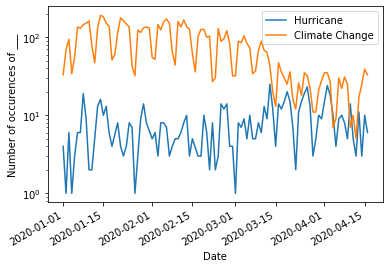

In [7]:
# Plot

ax1 = df_hurricane['date'].value_counts(sort=False).plot(logy = True)
ax2 = df_climate_change['date'].value_counts(sort=False).plot(logy = True)
ax1.set_xlabel("Date")
ax1.set_ylabel("Number of occurences of ___")
ax1.legend(["Hurricane", "Climate Change"])


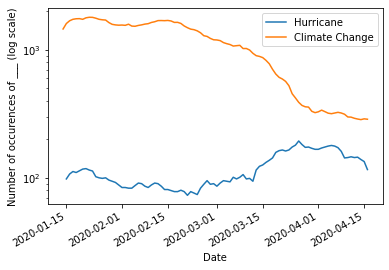

In [8]:
ax1_roll = df_hurricane['date'].value_counts(sort=False).rolling(14).sum().plot(logy = True)
ax2_roll = df_climate_change['date'].value_counts(sort=False).rolling(14).sum().plot(logy = True)
ax1_roll.set_xlabel("Date")
ax1_roll.set_ylabel("Number of occurences of ___ (log scale)")
ax1_roll.legend(["Hurricane", "Climate Change"])

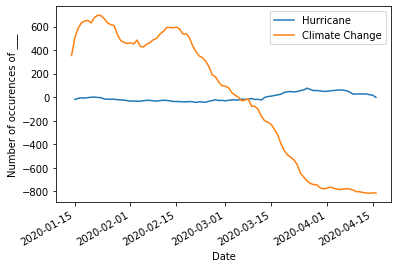

In [9]:
ax1_roll = (df_hurricane['date'].value_counts(sort=False).rolling(14).sum() - df_hurricane['date'].value_counts(sort=False).rolling(14).sum().mean()).plot()
ax2_roll = (df_climate_change['date'].value_counts(sort=False).rolling(14).sum() - df_climate_change['date'].value_counts(sort=False).rolling(14).sum().mean()).plot()
ax1_roll.set_xlabel("Date")
ax1_roll.set_ylabel("Gap to average of ___")
ax1_roll.legend(["Hurricane", "Climate Change"])

In [10]:
# ax = df_treat['date'].value_counts(sort=False).plot.bar()
# for i, t in enumerate(ax.get_xticklabels()):
#     if (i % 10) != 0:
#         t.set_visible(False)
#     t = str(t)[:10]